# My program to find and plot shortest route to school from my home

Install the required libraries first:-
*   using osmnx for fetching local map data from OpenStreetMap
*   using matplotlib for visualization and display purpose




In [3]:
!pip install osmnx
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


Import the required libraries:-
*   geopandas used for ease of working with geospatial data
*   networkx used for understanding structure of graph networks
*   osmnx used for fetching map data from OpenStreetMaps
*   numpy used for arrays and matrix
*   matplotlib used for creating graphs and visualizations


In [1]:
import geopandas as gpd
import networkx as nx
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I set my home location using GPS coordinates fetched from maps.google.co.uk and mode as 'walk'. I fetch graphs upto 1500 meters from my home. The graph object returned is of type: MultiDiGraph. I convert it to geopandas.GeoDataFrames and then plot it using osmnx's plot_graph function.

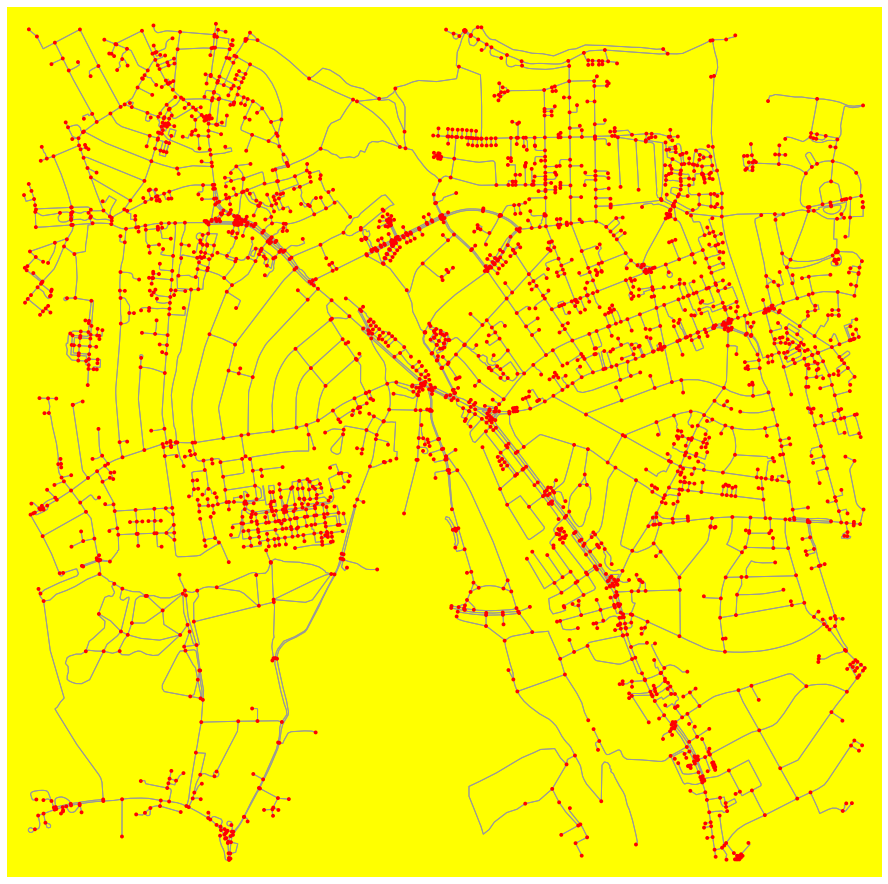

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa87d394790>)

In [8]:
home = (51.64605421297856, -0.1896608786622757)
mode = "walk"
ox.config(log_console=True, use_cache=True)
G = ox.graph_from_point(home, dist=1500, simplify=True, network_type=mode, clean_periphery=True)
nodes_proj, edges_proj = ox.graph_to_gdfs(G, nodes=True, edges=True)
ox.plot_graph(G, figsize=(16, 16), bgcolor='yellow', node_color='red', node_size=15)

I set my destination's (school) GPS co-ordinates. I fetch the nearest nodes to home and school and then call the shortest_path() function to get the shortest route. It returns a list. I created a bounding box of distance 1500m from home, fetch k_shortest_paths and plot them on the graph.

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


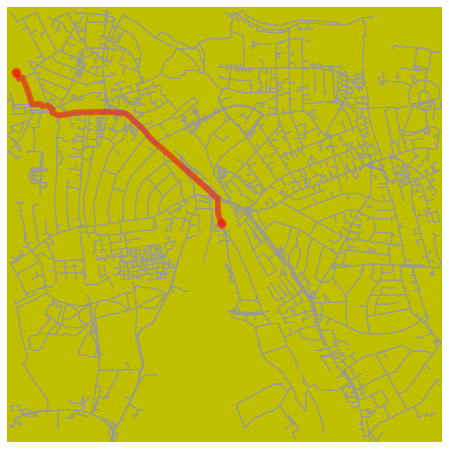

In [16]:
school = (51.65547617108221, -0.21344183201814174)
start_node = ox.get_nearest_node(G, home)
destination_node = ox.get_nearest_node(G, school)
route = ox.shortest_path(G, start_node,destination_node)
bbox = ox.utils_geo.bbox_from_point(point=home, dist=1500)
fig, ax = ox.plot_graph_route(G, route, bbox = bbox, route_linewidth=6, node_size=0, bgcolor='y')

Next I check all the k_shortest_paths from home to school

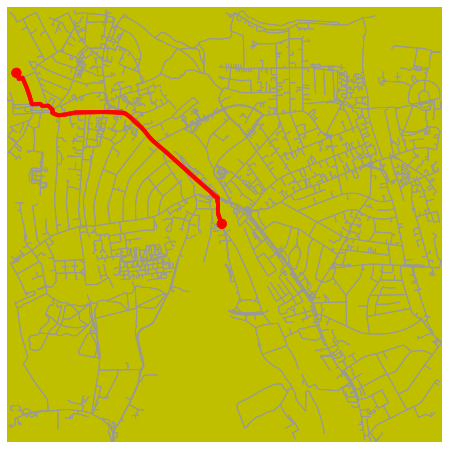

In [14]:
routes = ox.k_shortest_paths(G, start_node, destination_node, k=5, weight='length')
fig, ax = ox.plot_graph_routes(G, list(routes), bbox = bbox, route_colors='r', route_linewidth=2, node_size=0, bgcolor='y')

Check for any one-way driving roads (although I'm not driving!)

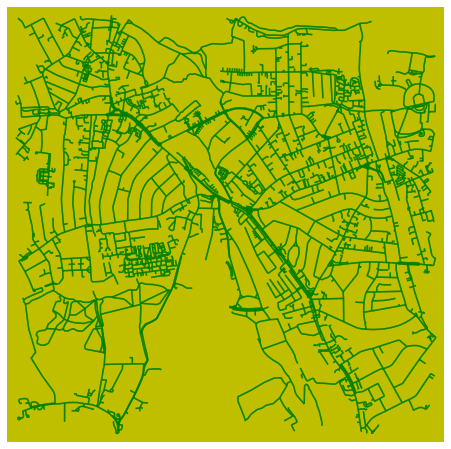

In [20]:
ec = ['r' if data['oneway'] else 'g' for u, v, key, data in G.edges(keys=True, data=True)] 
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7, bgcolor='y')

Show the streets in a larger size map

In [22]:
start_node = list(G.nodes())[0] 
destination_node = list(G.nodes())[-1] 
route = nx.shortest_path(G, start_node, destination_node) 
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2) 
route_graph_map = ox.plot_route_folium(G, route, route_map=graph_map, popup_attribute='length')
route_graph_map.save('route.html') 
route_graph_map

Output hidden; open in https://colab.research.google.com to view.